In [3]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from photutils import SkyCircularAperture
from photutils import DAOStarFinder
from astropy.stats import mad_std
import astropy.io.fits as fits
import ccdproc
import glob


In [4]:
# Data Reduction
bias_list = glob.glob('./Data/Data Reduction/bias*.fits')
print(bias_list)

['./Data/Data Reduction\\bias.0006.fits', './Data/Data Reduction\\bias.0007.fits', './Data/Data Reduction\\bias.0008.fits', './Data/Data Reduction\\bias.0009.fits', './Data/Data Reduction\\bias.0010.fits', './Data/Data Reduction\\bias.0011.fits', './Data/Data Reduction\\bias.0012.fits', './Data/Data Reduction\\bias.0013.fits', './Data/Data Reduction\\bias.0014.fits', './Data/Data Reduction\\bias.0015.fits', './Data/Data Reduction\\bias.0016.fits']


In [5]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in bias_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exptime']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

Exposure time 0 sec
Mean counts: 351.70

Exposure time 0 sec
Mean counts: 351.36

Exposure time 0 sec
Mean counts: 351.65

Exposure time 0 sec
Mean counts: 351.74

Exposure time 0 sec
Mean counts: 351.68

Exposure time 0 sec
Mean counts: 351.71

Exposure time 0 sec
Mean counts: 351.40

Exposure time 0 sec
Mean counts: 351.68

Exposure time 0 sec
Mean counts: 351.69

Exposure time 0 sec
Mean counts: 351.58

Exposure time 0 sec
Mean counts: 351.50



the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


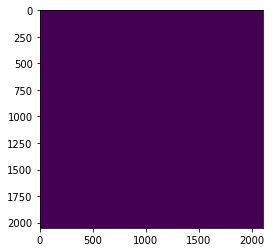

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
master = ccdproc.combine(bias_list,unit=u.electron)
plt.imshow(master)


In [7]:
master

CCDData([[ 317.27272727,  315.90909091, 1549.45454545, ..., 1106.27272727,
           338.54545455,  338.54545455],
         [ 303.45454545,  302.        ,  333.45454545, ...,  342.        ,
           309.09090909,  309.36363636],
         [ 313.63636364,  311.63636364,  342.        , ...,  349.54545455,
           316.72727273,  316.81818182],
         ...,
         [ 318.36363636,  316.36363636,  347.63636364, ...,  350.        ,
           318.54545455,  319.27272727],
         [ 306.09090909,  306.18181818,  335.81818182, ...,  340.09090909,
           307.90909091,  308.27272727],
         [ 327.09090909,  327.18181818, 1315.63636364, ..., 1637.36363636,
           333.18181818,  333.90909091]])

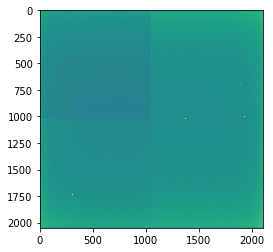

In [8]:
plt.imshow(master, vmin=300, vmax=400)

In [9]:
master_mean = np.mean(master)
print("The master bias mean is {0:.3f}.".format(master_mean))

The master bias mean is 351.608.


C:\Users\sonia\Miniconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log
C:\Users\sonia\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log
C:\Users\sonia\Miniconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log
C:\Users\sonia\Miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


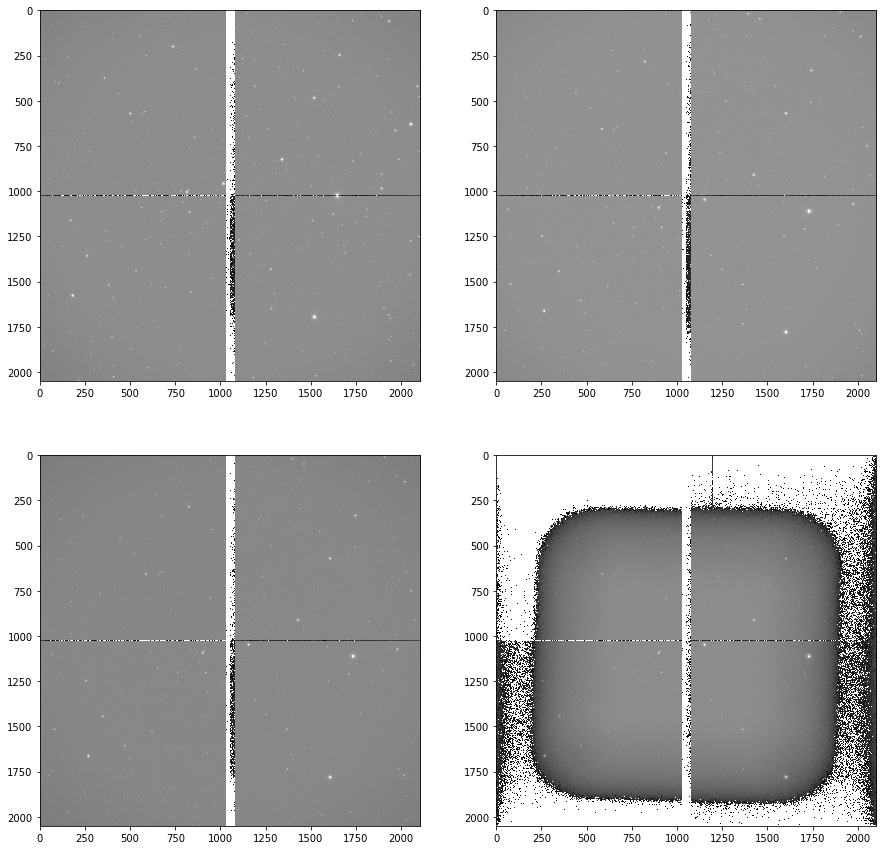

In [10]:

wolf_image1 = fits.open("./Data/Data Reduction/Wolf Images/wolf1346_.0001.fits")
wolf_image2 = fits.open("./Data/Data Reduction/Wolf Images/wolf1346_.0002.fits")
wolf_image3 = fits.open("./Data/Data Reduction/Wolf Images/wolf1346_.0003.fits")
wolf_image4 = fits.open("./Data/Data Reduction/Wolf Images/wolf1346_m.0001.fits")


image_data1 = wolf_image1[0].data
image_data2 = wolf_image2[0].data
image_data3 = wolf_image3[0].data
image_data4 = wolf_image4[0].data

subtract1 = image_data1 - master_mean
subtract2 = image_data2 - master_mean
subtract3 = image_data3 - master_mean
subtract4 = image_data4 - master_mean

fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,15)

ax[0,0].imshow(np.log(subtract1), cmap=plt.cm.gray);
ax[0,1].imshow(np.log(subtract2), cmap=plt.cm.gray)
ax[1,0].imshow(np.log(subtract3), cmap=plt.cm.gray)
ax[1,1].imshow(np.log(subtract4), cmap=plt.cm.gray)

In [11]:
flat_list = glob.glob('./Data/Data Reduction/Flat Images/flat*.fits')
print(flat_list)


['./Data/Data Reduction/Flat Images\\flat.0005.fits', './Data/Data Reduction/Flat Images\\flat.0006.fits', './Data/Data Reduction/Flat Images\\flat.0007.fits', './Data/Data Reduction/Flat Images\\flat.0008.fits', './Data/Data Reduction/Flat Images\\flat.0009.fits', './Data/Data Reduction/Flat Images\\flat.0010.fits', './Data/Data Reduction/Flat Images\\flat.0011.fits', './Data/Data Reduction/Flat Images\\flat.0012.fits', './Data/Data Reduction/Flat Images\\flat.0013.fits', './Data/Data Reduction/Flat Images\\flat.0014.fits', './Data/Data Reduction/Flat Images\\flat.0015.fits', './Data/Data Reduction/Flat Images\\flat.0016.fits', './Data/Data Reduction/Flat Images\\flat.0017.fits', './Data/Data Reduction/Flat Images\\flat.0018.fits', './Data/Data Reduction/Flat Images\\flat.0019.fits', './Data/Data Reduction/Flat Images\\flat.0020.fits', './Data/Data Reduction/Flat Images\\flat.0021.fits', './Data/Data Reduction/Flat Images\\flat.0022.fits', './Data/Data Reduction/Flat Images\\flat.0023

In [12]:
flat_filter = []
name = []

for filename in flat_list:
    # Open the FITS file
    hdu1 = fits.open(filename)
    
    flat_filter = hdu1[0].header['FILTER']
    print('Filter: {}'.format(flat_filter))
    
    
    name = hdu1[0].header['FILENAME']
    print('File Name: {}'.format(name))

flat_filter = np.array(flat_filter)
name = np.array(name)

name_sort = np.argsort(name)
name = name[name_sort]
flat_filter = flat_filter[name_sort]

Filter: Wash M
File Name: flat.0005.fits
Filter: Wash M
File Name: flat.0006.fits
Filter: Wash M
File Name: flat.0007.fits
Filter: Wash M
File Name: flat.0008.fits
Filter: Wash M
File Name: flat.0009.fits
Filter: Wash M
File Name: flat.0010.fits
Filter: Wash M
File Name: flat.0011.fits
Filter: Wash M
File Name: flat.0012.fits
Filter: Wash M
File Name: flat.0013.fits
Filter: Wash M
File Name: flat.0014.fits
Filter: Wash M
File Name: flat.0015.fits
Filter: Wash M
File Name: flat.0016.fits
Filter: J-C Rc
File Name: flat.0017.fits
Filter: J-C Rc
File Name: flat.0018.fits
Filter: J-C Rc
File Name: flat.0019.fits
Filter: J-C Rc
File Name: flat.0020.fits
Filter: J-C Rc
File Name: flat.0021.fits
Filter: J-C Rc
File Name: flat.0022.fits
Filter: J-C Rc
File Name: flat.0023.fits
Filter: J-C Rc
File Name: flat.0024.fits
Filter: J-C Rc
File Name: flat.0025.fits
Filter: J-C Rc
File Name: flat.0026.fits
Filter: J-C Rc
File Name: flat.0027.fits
Filter: J-C Rc
File Name: flat.0028.fits
Filter: J-C Rc
F

IndexError: too many indices for array

In [16]:
Wash_M = []
JC_RC = []

for filename in flat_list:
    # Open the FITS file
    hdu1 = fits.open(filename)
    
    flat_filter = hdu1[0].header['FILTER']
    if flat_filter == "J-C Rc":
        JC_RC.append(filename)
    else:
        Wash_M.append(filename)

Wash_M = np.array(Wash_M)
JC_RC = np.array(JC_RC)


In [18]:
print('Wash M Filter: {}'.format(Wash_M))


Wash M Filter: ['./Data/Data Reduction/Flat Images\\flat.0005.fits'
 './Data/Data Reduction/Flat Images\\flat.0006.fits'
 './Data/Data Reduction/Flat Images\\flat.0007.fits'
 './Data/Data Reduction/Flat Images\\flat.0008.fits'
 './Data/Data Reduction/Flat Images\\flat.0009.fits'
 './Data/Data Reduction/Flat Images\\flat.0010.fits'
 './Data/Data Reduction/Flat Images\\flat.0011.fits'
 './Data/Data Reduction/Flat Images\\flat.0012.fits'
 './Data/Data Reduction/Flat Images\\flat.0013.fits'
 './Data/Data Reduction/Flat Images\\flat.0014.fits'
 './Data/Data Reduction/Flat Images\\flat.0015.fits'
 './Data/Data Reduction/Flat Images\\flat.0016.fits']


In [19]:
print('J-C Rc Filter: {}'.format(JC_RC))


J-C Rc Filter: ['./Data/Data Reduction/Flat Images\\flat.0017.fits'
 './Data/Data Reduction/Flat Images\\flat.0018.fits'
 './Data/Data Reduction/Flat Images\\flat.0019.fits'
 './Data/Data Reduction/Flat Images\\flat.0020.fits'
 './Data/Data Reduction/Flat Images\\flat.0021.fits'
 './Data/Data Reduction/Flat Images\\flat.0022.fits'
 './Data/Data Reduction/Flat Images\\flat.0023.fits'
 './Data/Data Reduction/Flat Images\\flat.0024.fits'
 './Data/Data Reduction/Flat Images\\flat.0025.fits'
 './Data/Data Reduction/Flat Images\\flat.0026.fits'
 './Data/Data Reduction/Flat Images\\flat.0027.fits'
 './Data/Data Reduction/Flat Images\\flat.0028.fits'
 './Data/Data Reduction/Flat Images\\flat.0029.fits'
 './Data/Data Reduction/Flat Images\\flat.0030.fits'
 './Data/Data Reduction/Flat Images\\flat.0031.fits'
 './Data/Data Reduction/Flat Images\\flat.0032.fits'
 './Data/Data Reduction/Flat Images\\flat.0033.fits'
 './Data/Data Reduction/Flat Images\\flat.0034.fits'
 './Data/Data Reduction/Flat Im

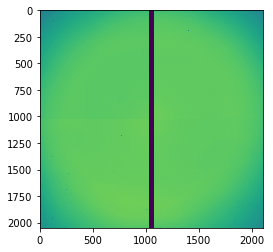

In [20]:
master_JCRC = ccdproc.combine(JC_RC,unit=u.electron, method = 'median')
plt.imshow(master_JCRC)

 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


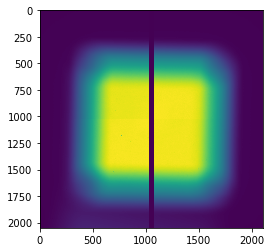

In [14]:
master_Wash = ccdproc.combine(Wash_M,unit=u.electron, method = 'median')
plt.imshow(master_Wash)